In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('data/salary_dataset.xlsx', index_col='Unnamed: 0')

In [4]:
df.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes


In [6]:
x = df['YearsExperience']
y = df['Salary']

#### Inferring the stats from x

In [7]:
print('Median of YearsExperience:', x.median())
print('Mode of YearsExperience:', x.mode()[0])

Median of YearsExperience: 4.8
Mode of YearsExperience: 3.3


In [8]:
df['YearsExperience'].describe()

count    30.000000
mean      5.413333
std       2.837888
min       1.200000
25%       3.300000
50%       4.800000
75%       7.800000
max      10.600000
Name: YearsExperience, dtype: float64

In [9]:
skewness = x.skew()
print('Skewness of YearsExperience:', skewness)

if skewness > 0:
    print('The data is right skewed.')
elif skewness < 0:
    print('The data is left skewed.')
else:
    print('The data is symmetric.')

Skewness of YearsExperience: 0.37956024064804433
The data is right skewed.


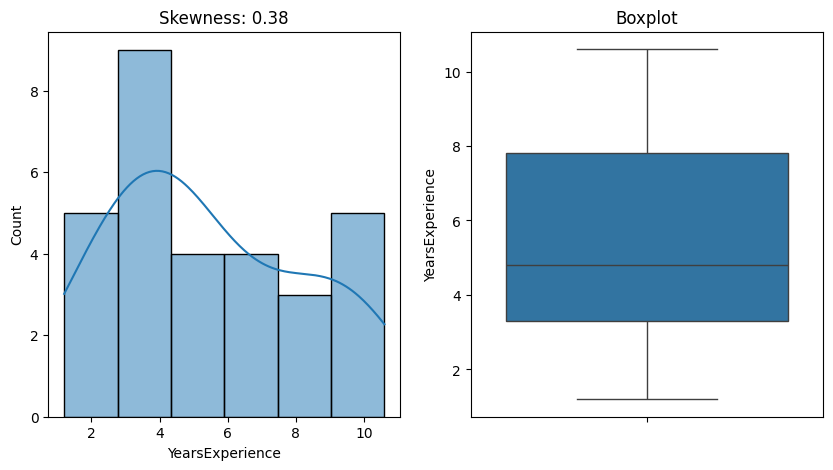

In [10]:
# use subplots to have two plots in the same figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plotting the skewness
sns.histplot(x, ax=ax[0], kde=True)
ax[0].set_title('Skewness: {:.2f}'.format(skewness))

# plotting the boxplot
sns.boxplot(x, ax=ax[1])
ax[1].set_title('Boxplot')

plt.show()

In [11]:
# the data is right skewed
# the data has outliers?

In [12]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(x < lower_bound) | (x > upper_bound)]

len(outliers)

0

In [13]:
# data does not have any outliers

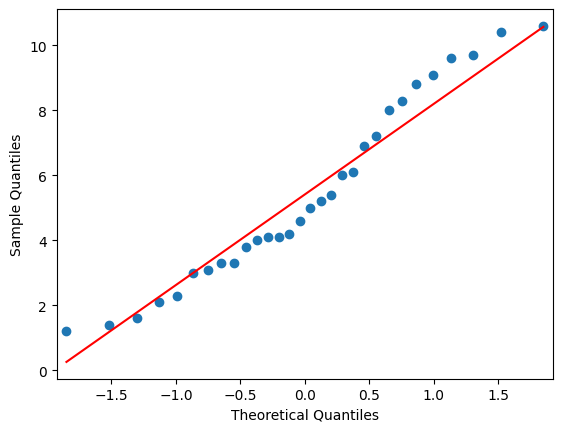

In [14]:
fig = sm.qqplot(x, line='s')
plt.show()

In [15]:
_, pvalue = stats.shapiro(x)
print('Shapiro-Wilk Test p-value:', pvalue.round(3))

Shapiro-Wilk Test p-value: 0.103


In [16]:
# both the p-value (> 0.05) and the Q-Q plot suggest that the data is normally distributed

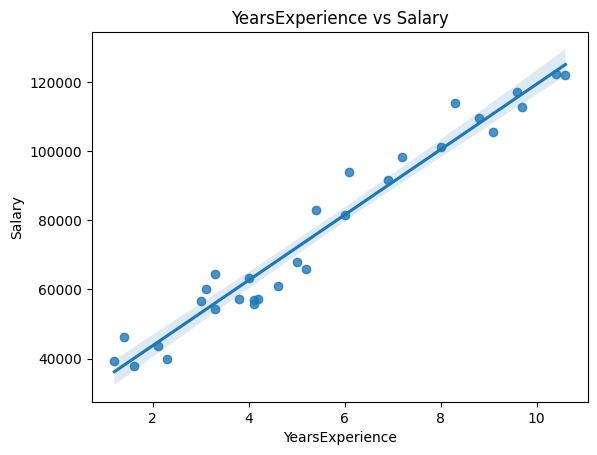

In [17]:
# check for linearity

sns.regplot(x=x, y=y)
plt.title('YearsExperience vs Salary')
plt.show()

In [18]:
# find the correlation between the two variables

correlation, pvalue = stats.pearsonr(x, y)
print('Pearsons Correlation:', correlation.round(3))
print('P-value:', pvalue)

Pearsons Correlation: 0.978
P-value: 1.143068109227318e-20
